In [2]:
import json
import numpy as np
from itertools import product
import matplotlib.pyplot  as plt

In [16]:
# Save the matrices to a JSON file
with open('matrices5by5.json', 'r') as f:
  matrices_data = json.load(f)

In [17]:
len(matrices_data)

100

In [18]:
qubo = np.array(matrices_data[6])*30
penalty_term = 5
hamming_weight = 3

In [19]:
for i in range(qubo.shape[0]):
    qubo[i, i] += penalty_term * (1 - 2 * hamming_weight)  # Hamming weight 페널티 적용
    for j in range(i + 1, qubo.shape[0]):
        qubo[i, j] +=  penalty_term
        qubo[j, i] +=  penalty_term  # 대칭성 유지

Optimal solution: None
Optimal value: inf


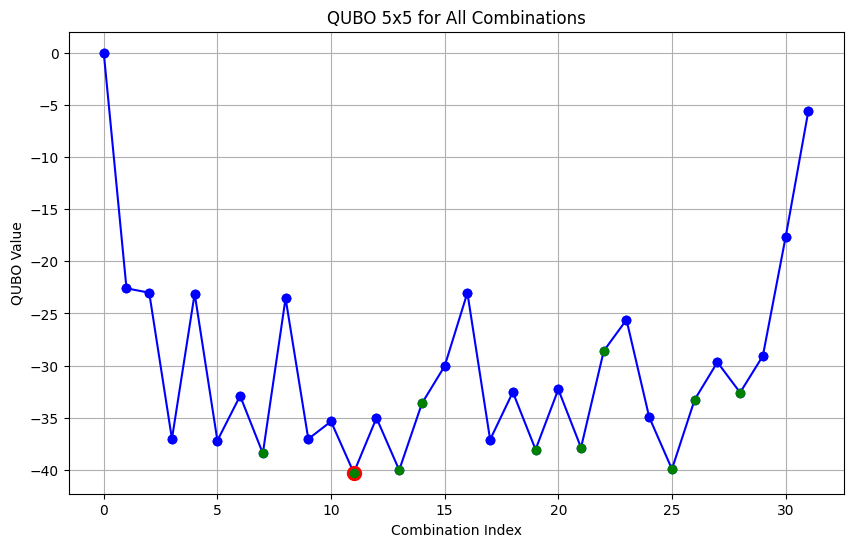

In [20]:
from itertools import product

# Generate all possible combinations of binary vector x
all_combinations = list(product([0, 1], repeat=qubo.shape[0]))

# Initialize variables to store the optimal solution and its value
best_solution = None
best_value = float('inf')

# Print the optimal solution and its value
print(f"Optimal solution: {best_solution}")
print(f"Optimal value: {best_value}")


# Plot all combinations and their corresponding values
combinations_values = [np.array(comb).T@qubo@np.array(comb) for comb in all_combinations]

plt.figure(figsize=(10, 6))
plt.plot(range(len(all_combinations)), combinations_values, marker='o', linestyle='-', color='b')
plt.xlabel('Combination Index')
plt.ylabel('QUBO Value')
# Highlight even and odd combinations differently
min_idx = np.argmin(combinations_values)
plt.plot(min_idx, combinations_values[min_idx], marker='o', color='r', markersize=10)  # Red for minimum value
for idx, val in enumerate(combinations_values):
  if sum(all_combinations[idx]) == hamming_weight:
    plt.plot(idx, val, marker='o', color='g')  # Green for combinations with Hamming weight
  else:
    plt.plot(idx, val, marker='o', color='b')  # Blue for odd indices

plt.title(f'QUBO {qubo.shape[0]}x{qubo.shape[0]} for All Combinations')
plt.grid(True)
plt.show()